In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

## **📌 Step 1: Load and explore the data**

In [17]:
# Load dataset
df = pd.read_csv("sample_linear_regression.csv")

# Display first few rows
print(df.head())

# Check summary statistics
print(df.describe())

    Feature     Target
0  1.000000   7.967142
1  1.246231   2.356050
2  1.492462  10.954272
3  1.738693  20.446379
4  1.984925   3.613240
          Feature      Target
count  200.000000  200.000000
mean    25.500000   76.092290
std     14.251658   44.400130
min      1.000000   -6.529787
25%     13.250000   37.387353
50%     25.500000   75.562377
75%     37.750000  116.103617
max     50.000000  162.427822


## **📌 Step 2: Split the data into train-test split**

In [18]:
from sklearn.model_selection import train_test_split

# Define feature and target variables
X = df[["Feature"]].values
y = df["Target"].values.reshape(-1, 1)

# Split into Train and Test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **📌 Step 3: Train a Linear regression model(Underfit)**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on Training & Test Data
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Calculate MSE
mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)

print(f"Linear Regression Train MSE: {mse_train_linear:.4f}")
print(f"Linear Regression Test MSE: {mse_test_linear:.4f}")


Linear Regression Train MSE: 88.0569
Linear Regression Test MSE: 77.1915


## **📌 Step 4: Train a polynomial regression model(Overfit)**

In [23]:
from sklearn.preprocessing import PolynomialFeatures

# Apply Polynomial Features (Degree = 5)
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on Training & Test Data
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

# Calculate MSE
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)

print(f"Polynomial Regression Train MSE: {mse_train_poly:.4f}")
print(f"Polynomial Regression Test MSE: {mse_test_poly:.4f}")


Polynomial Regression Train MSE: 84.4634
Polynomial Regression Test MSE: 75.4827


## **📌 Step 5: Compare Model Performance**

In [21]:
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression (Underfit)", "Polynomial Regression (Overfit)"],
    "Train MSE": [mse_train_linear, mse_train_poly],
    "Test MSE": [mse_test_linear, mse_test_poly]
})

print(comparison_df)

                             Model  Train MSE   Test MSE
0     Linear Regression (Underfit)  88.056858  77.191517
1  Polynomial Regression (Overfit)  84.463448  75.482716


## **📌 Step 6: Visualize the result**

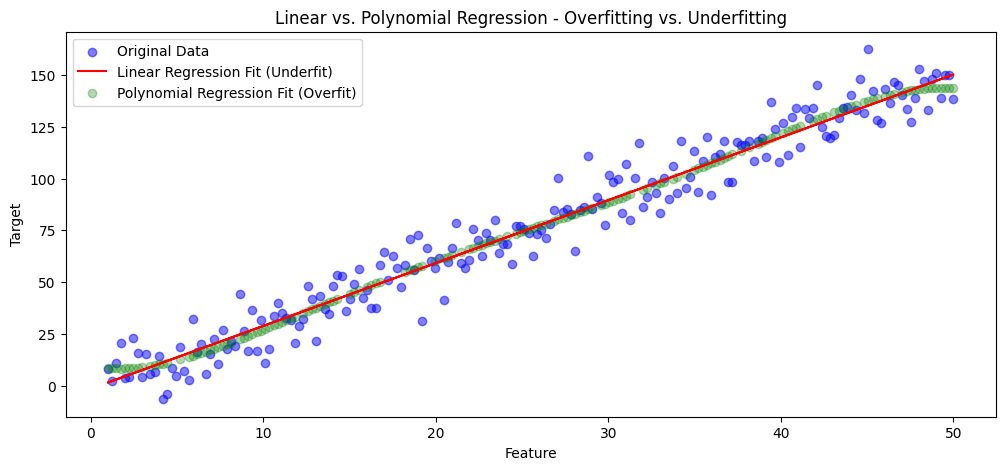

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Scatter plot of original data
plt.scatter(X, y, color="blue", alpha=0.5, label="Original Data")

# Plot Linear Regression Predictions
plt.plot(X_train, y_train_pred_linear, color="red", label="Linear Regression Fit (Underfit)")

# Plot Polynomial Regression Predictions
plt.scatter(X_train, y_train_pred_poly, color="green", label="Polynomial Regression Fit (Overfit)", alpha=0.3)

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear vs. Polynomial Regression - Overfitting vs. Underfitting")
plt.legend()
plt.show()
